In [ ]:
import numpy as np
import matplotlib.pyplot as plt

eta=10
b=8/3
r=28

In [ ]:
def system(t,x):
    return np.array([-eta*x[0] + eta*x[1], r*x[0] - x[1]- x[0]*x[2], x[0]*x[1] - b*x[2]])

In [ ]:
def RK_step(f,x,t,h):
    k1 = f(t,x)
    k2 = f(t + h/2,x + h/2*k1)
    k3 = f(t + h/2,x + h/2*k2)
    k4 = f(t + h,x + h*k3)
    return t + h,x + h/6*(k1 + 2*k2 + 2*k3 + k4)

def Runge_launch(f,start,tbounds,h):
    x = np.copy(start)
    x = x[np.newaxis,:]
    t = [tbounds[0]]
    h_cur = h
    while t[-1] <= tbounds[1]:
        t2,x2 = RK_step(f,x[-1],t[-1],h_cur)
        x = np.append(x,[x2],axis = 0)
        t = np.append(t,[t2],axis = 0)
    return t,x

In [ ]:
sol = Runge_launch(system,[3.051522,  1.582542, 15.62388],[0,100],1e-2)

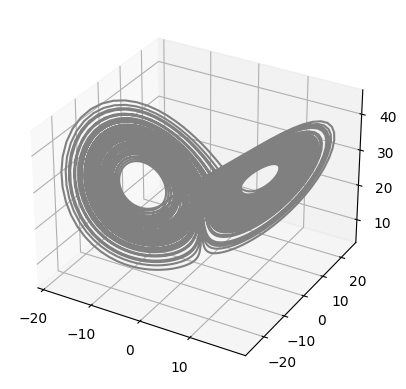

In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = sol[1][:,0]
yline = sol[1][:,1]
zline = sol[1][:,2]
ax.plot3D(xline, yline, zline, 'gray')